In [1]:
# import pandas
import pandas as pd

# read the file from google colab
from google.colab import files
uploaded = files.upload()


import io

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense



Saving crx.data to crx.data


Using TensorFlow backend.


In [2]:
df = pd.read_table( io.BytesIO (uploaded['crx.data']), header=None, delimiter=',')

# read data
print(df.head())

  0      1      2  3  4  5  6     7  8  9   10 11 12     13   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  00202    0  +
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g  00043  560  +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  00280  824  +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  00100    3  +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  00120    0  +


In [3]:
print(df.dtypes)

#import numpy
import numpy as np


# replace mssing values '?' with Na
df = df.replace('?', np.NaN)

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object


In [4]:
# replace the missing values with mean 
df.fillna(df.mean(), inplace=True)

# count the number of NaNs to verify that there are no missing values
print(df.isnull().values.sum())

67


In [ ]:
# still the missing values are present. And those are for non-numeric columns. 
# As the mean impuatation does not work for non-numeric values the most frequent value from the column, is imputed to missing values for the respective columns. 

In [5]:
for col in df.columns:

  # first check if the column is of object type
  if df[col].dtypes == 'object':

    #impute the most frequent value
    df = df.fillna(df[col].value_counts().index[0])


# again count the missing values
print(df.isnull().values.sum())

0


In [ ]:
print(df)

    0      1       2  3  4   5   6     7  8  9   10 11 12     13   14 15
0    b  30.83   0.000  u  g   w   v  1.25  t  t   1  f  g  00202    0  +
1    a  58.67   4.460  u  g   q   h  3.04  t  t   6  f  g  00043  560  +
2    a  24.50   0.500  u  g   q   h  1.50  t  f   0  f  g  00280  824  +
3    b  27.83   1.540  u  g   w   v  3.75  t  t   5  t  g  00100    3  +
4    b  20.17   5.625  u  g   w   v  1.71  t  f   0  f  s  00120    0  +
..  ..    ...     ... .. ..  ..  ..   ... .. ..  .. .. ..    ...  ... ..
685  b  21.08  10.085  y  p   e   h  1.25  f  f   0  f  g  00260    0  -
686  a  22.67   0.750  u  g   c   v  2.00  f  t   2  t  g  00200  394  -
687  a  25.25  13.500  y  p  ff  ff  2.00  f  t   1  t  g  00200    1  -
688  b  17.92   0.205  u  g  aa   v  0.04  f  f   0  f  g  00280  750  -
689  b  35.00   3.375  u  g   c   h  8.29  f  f   0  t  g  00000    0  -

[690 rows x 16 columns]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


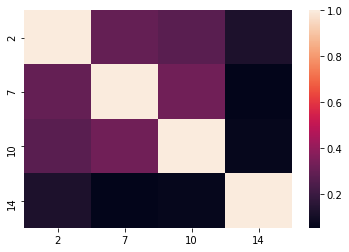

In [ ]:
import seaborn as sns
import matplotlib as plt

# get correlation between variables
corr = df.corr()

# create a heatmap-type chart to display correlations 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)




In [6]:

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in df.columns:
    # Compare if the dtype is object
    if df[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        df[col]=le.fit_transform(df[col])
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    int64  
 1   1       690 non-null    int64  
 2   2       690 non-null    float64
 3   3       690 non-null    int64  
 4   4       690 non-null    int64  
 5   5       690 non-null    int64  
 6   6       690 non-null    int64  
 7   7       690 non-null    float64
 8   8       690 non-null    int64  
 9   9       690 non-null    int64  
 10  10      690 non-null    int64  
 11  11      690 non-null    int64  
 12  12      690 non-null    int64  
 13  13      690 non-null    int64  
 14  14      690 non-null    int64  
 15  15      690 non-null    int64  
dtypes: float64(2), int64(14)
memory usage: 86.4 KB


In [ ]:
print(df)


     0    1       2   3   4   5   6     7   8   9   10  11  12  13   14  15
0     1  156   0.000   2   1  13   8  1.25   1   1   1   0   0  68    0   0
1     0  328   4.460   2   1  11   4  3.04   1   1   6   0   0  11  560   0
2     0   89   0.500   2   1  11   4  1.50   1   0   0   0   0  96  824   0
3     1  125   1.540   2   1  13   8  3.75   1   1   5   1   0  31    3   0
4     1   43   5.625   2   1  13   8  1.71   1   0   0   0   2  37    0   0
..   ..  ...     ...  ..  ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...  ..
685   1   52  10.085   3   3   5   4  1.25   0   0   0   0   0  90    0   1
686   0   71   0.750   2   1   2   8  2.00   0   1   2   1   0  67  394   1
687   0   97  13.500   3   3   6   3  2.00   0   1   1   1   0  67    1   1
688   1   20   0.205   2   1   0   8  0.04   0   0   0   0   0  96  750   1
689   1  197   3.375   2   1   2   4  8.29   0   0   0   1   0   0    0   1

[690 rows x 16 columns]


In [7]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# import numpy as np

# Drop the features 11 and 13 and convert the DataFrame to a NumPy array
df = df.drop(columns=[11, 13])
df = df.values

# Segregate features and labels into separate variables
X,y = df[:,0:13] , df[:,13]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

In [8]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0, 1))

# then use the scaler to rescale X_train and X_test values
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

Create Keras sequential model 

For first two layers, RELU activation function was used and for the third layer sigmoid function was  used.

In [36]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(8, activation='sigmoid', input_shape=(13,)))

# model.add(Dense(8, activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))

complie the neural network.

In [37]:
# binary_crossentropy

model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=10, batch_size=1, verbose=1)

Epoch 1/10
462/462 [==============================] - 0s 864us/step - loss: 0.2319 - accuracy: 0.6385
Epoch 2/10
462/462 [==============================] - 0s 805us/step - loss: 0.2262 - accuracy: 0.6710
Epoch 3/10
462/462 [==============================] - 0s 890us/step - loss: 0.2228 - accuracy: 0.6818
Epoch 4/10
462/462 [==============================] - 0s 747us/step - loss: 0.2213 - accuracy: 0.6840
Epoch 5/10
462/462 [==============================] - 0s 741us/step - loss: 0.2206 - accuracy: 0.6753
Epoch 6/10
462/462 [==============================] - 0s 739us/step - loss: 0.2209 - accuracy: 0.6797
Epoch 7/10
462/462 [==============================] - 0s 803us/step - loss: 0.2252 - accuracy: 0.6558
Epoch 8/10
462/462 [==============================] - 0s 861us/step - loss: 0.2342 - accuracy: 0.5866
Epoch 9/10
462/462 [==============================] - 0s 832us/step - loss: 0.2291 - accuracy: 0.6602
Epoch 10/10
462/462 [==============================] - 0s 750us/step - loss: 0.226

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [11]:
# print the weights of the model in each layer

for layer in model.layers:
    weights = layer.get_weights()
    # print(weights)

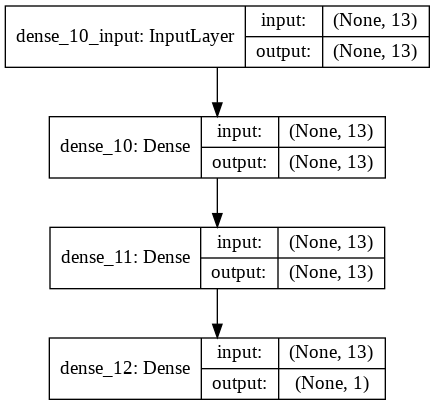

In [ ]:
# plot the layers of the model and the shape

from keras.utils import plot_model
plot_model(model, to_file='/tmp/model.png', show_shapes=True,)

In [38]:
# Evaluate the model with the prediction data
y_pred = model.predict_classes(X_test)

In [39]:
# print the score or the accuracy of the model

score = model.evaluate(X_test, y_test,verbose=1)

print(score)

228/228 [==============================] - 0s 79us/step
[0.23083383681481345, 0.6666666865348816]


Perform 5-fold cross validation 